In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [21]:
#load dataset
dataframe=pd.read_csv('Salary Data.csv')
dataframe["Career_Start_Age"] = df["Age"] - df["Years of Experience"]
dataframe.to_csv("Salary_Data_With_Career_Start_Age.csv", index=False)

In [36]:
df=pd.read_csv('Salary_Data_With_Career_Start_Age.csv')
df = df.fillna(df.median(numeric_only=True))
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Career_Start_Age
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,27.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,25.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,30.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,29.0
4,52.0,Male,Master's,Director,20.0,200000.0,32.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
 6   Career_Start_Age     375 non-null    float64
dtypes: float64(4), object(3)
memory usage: 20.6+ KB


In [38]:
df.describe()

,Age,Years of Experience,Salary,Career_Start_Age
count,375.000000,375.000000,375.00000,375.000000
mean,37.424000,10.025333,100547.60000,27.404000
std,7.050919,6.539884,48112.57612,1.478947
min,23.000000,0.000000,350.00000,22.500000
25%,31.500000,4.000000,55000.00000,26.000000
50%,36.000000,9.000000,95000.00000,28.000000
75%,44.000000,15.000000,140000.00000,28.000000
max,53.000000,25.000000,250000.00000,32.000000


In [39]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
Career_Start_Age       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

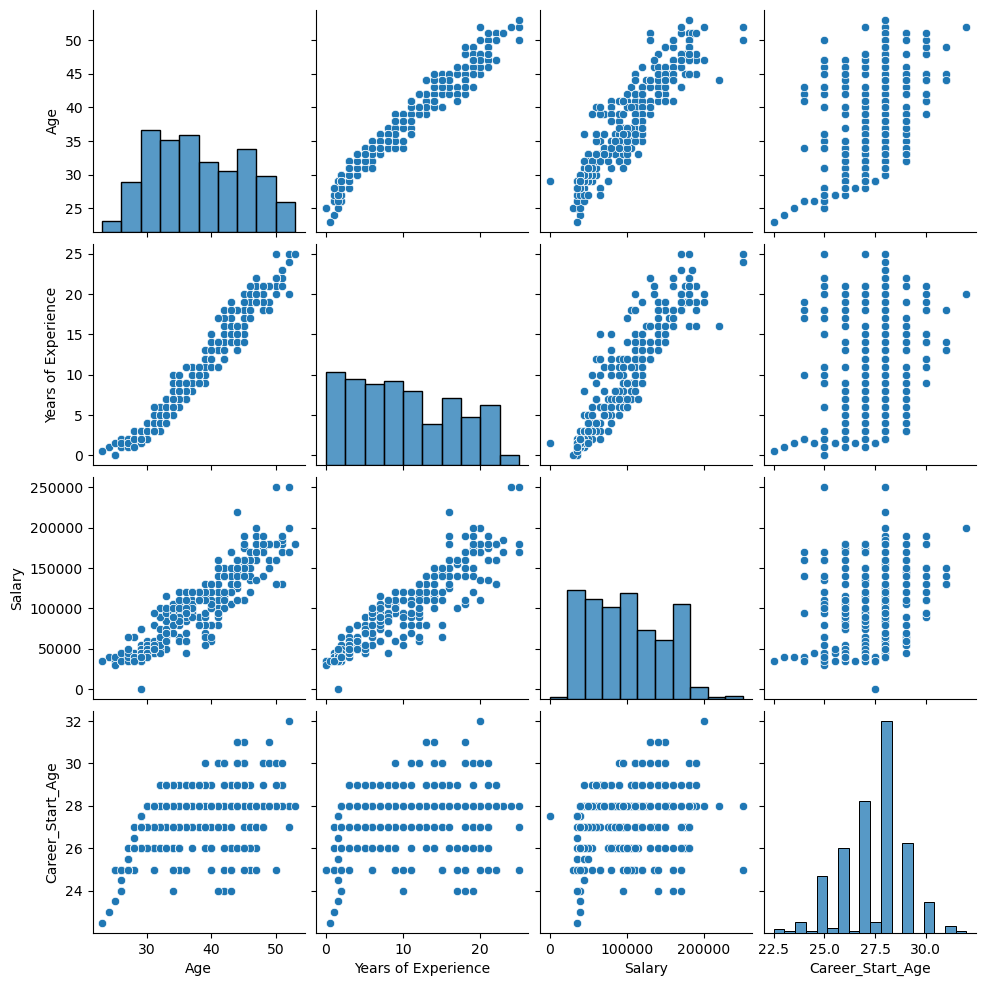

In [40]:
#pair plot
sns.pairplot(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

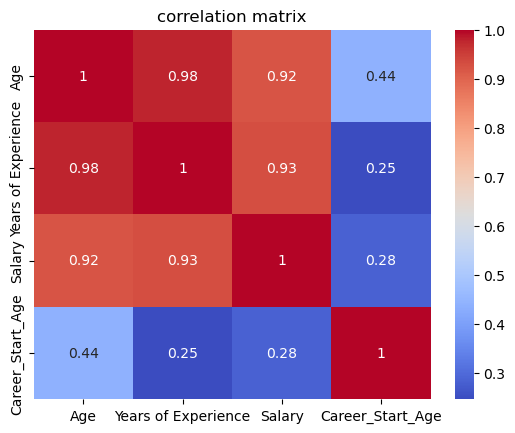

In [41]:
#correlation matrix
correlation_matrix=df[['Age','Years of Experience','Salary','Career_Start_Age']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show

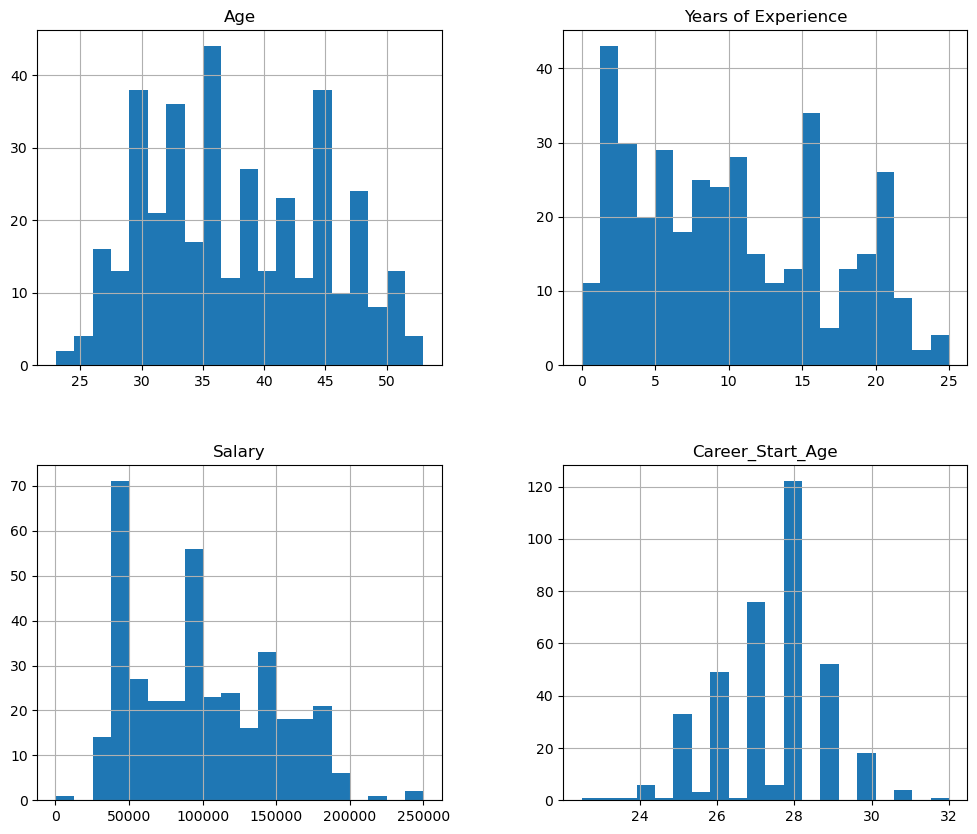

In [42]:
#histogram
df.hist(figsize=(12,10),bins=20)
plt.show()

In [83]:
# Data preprocessing
# Handle missing values for categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])

# Feature engineering
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

In [89]:
#model start

X = df.drop(['Salary'], axis=1)
y = df['Salary']

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
#create
simple_model=LinearRegression()
simple_model.fit(X_train,y_train)

LinearRegression()

In [98]:
# Make predictions
y_pred = simple_model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 358547929.1221775
R-squared: 0.8520255839267294


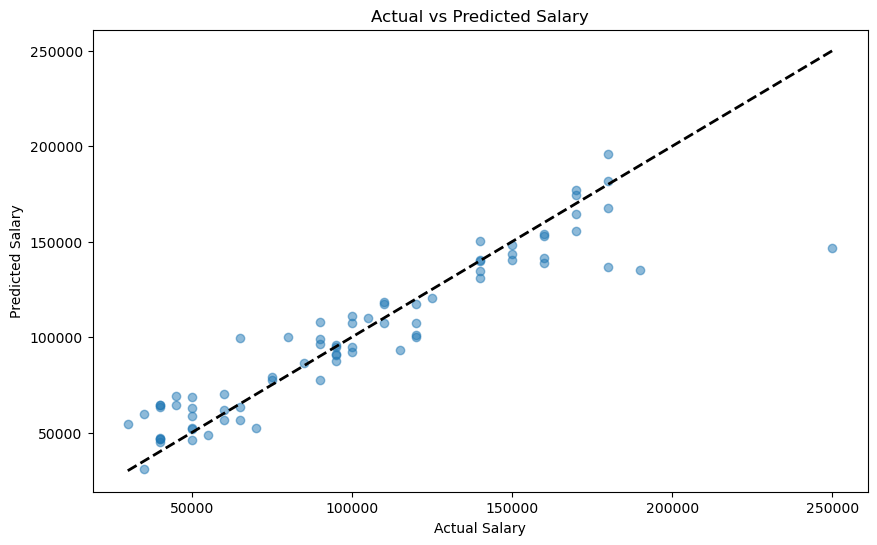

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()


In [112]:
print("Please enter the following details to predict salary:")
Age = float(input("Enter Age: "))
years_of_experience = float(input("Enter Years of Experience: "))
career_start_age = Age-years_of_experience

array = np.zeros((1, 179))
array[0, 0] = Age
array[0, 1] = years_of_experience
array[0, 2] = career_start_age
#predict the house price using the trained model
predicted_price=simple_model.predict(array)
print(f"The predicted salary is : ${predicted_price[0]:.2f}")

Please enter the following details to predict salary:


Enter Age:  45
Enter Years of Experience:  15


The predicted salary is : $120210.89


The predicted salary is : $76550.96
